# Machine Learning - Assignment 2 

## Spotify and Youtube Dataset Analysis

This notebook demonstrates  Data Exploration & Visualization, Pre-processing, Model building and Training, Clusters of the Spotify and youtube dataset on Kaggle.

Let's start by importing the necessary libraries:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, f1_score, ConfusionMatrixDisplay

### Part A:Data Exploration & Visualization 

#### Data Loading and Initial Exploration

In [8]:
# Load the dataset
df = pd.read_csv("Spotify_Youtube.csv", index_col=0) 
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


Artist                                        Url_spotify  \
0  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   

                                           Track  \
0                                 Feel Good Inc.   
1                                Rhinestone Eyes   
2  New Gold (feat. Tame Impala and Bootie Brown)   
3                             On Melancholy Hill   
4                                 Clint Eastwood   

                                           Album Album_type  \
0                                     Demon Days      album   
1                                  Plastic Beach      album   
2  New Gold (feat. Tame Impala and Bootie Brown)     single   
3                                  Plastic Beach      album   
4                                       Gorillaz      album   

                                    Uri  Danceability  Energy   Key  Loudness  \
0  spotify:track:0d28khcov6AiegSCpG5TuT         0.818   0.705   6.0    -6.679   
1  spotify:track:1foMv2HQwfQ2vntFf9HFeG         0.676   0.703   8.0    -5.815   
2  spotify:track:64dLd6rVqDLtkXFYrEUHIU         0.695   0.923   1.0    -3.930   
3  spotify:track:0q6LuUqGLUiCPP1cbdwFs3         0.689   0.739   2.0    -5.810   
4  spotify:track:7yMiX7n9SBvadzox8T5jzT         0.663   0.694  10.0    -8.627   

   ...                                  Url_youtube  \
0  ...  https://www.youtube.com/watch?v=HyHNuVaZJ-k   
1  ...  https://www.youtube.com/watch?v=yYDmaexVHic   
2  ...  https://www.youtube.com/watch?v=qJa-VFwPpYA   
3  ...  https://www.youtube.com/watch?v=04mfKJWDSzI   
4  ...  https://www.youtube.com/watch?v=1V_xRb0x9aw   

                                               Title   Channel        Views  \
0         Gorillaz - Feel Good Inc. (Official Video)  Gorillaz  693555221.0   
1  Gorillaz - Rhinestone Eyes [Storyboard Film] (...  Gorillaz   72011645.0   
2  Gorillaz - New Gold ft. Tame Impala & Bootie B...  Gorillaz    8435055.0   
3     Gorillaz - On Melancholy Hill (Official Video)  Gorillaz  211754952.0   
4         Gorillaz - Clint Eastwood (Official Video)  Gorillaz  618480958.0   

       Likes  Comments                                        Description  \
0  6220896.0  169907.0  Official HD Video for Gorillaz' fantastic trac...   
1  1079128.0   31003.0  The official video for Gorillaz - Rhinestone E...   
2   282142.0    7399.0  Gorillaz - New Gold ft. Tame Impala & Bootie B...   
3  1788577.0   55229.0  Follow Gorillaz online:\nhttp://gorillaz.com \...   
4  6197318.0  155930.0  The official music video for Gorillaz - Clint ...   

  Licensed official_video        Stream  
0     True           True  1.040235e+09  
1     True           True  3.100837e+08  
2     True           True  6.306347e+07  
3     True           True  4.346636e+08  
4     True           True  6.172597e+08  

[5 rows x 27 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20718 entries, 0 to 20717
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Url_spotify       20718 non-null  object 
 2   Track             20718 non-null  object 
 3   Album             20718 non-null  object 
 4   Album_type        20718 non-null  object 
 5   Uri               20718 non-null  object 
 6   Danceability      20716 non-null  float64
 7   Energy            20716 non-null  float64
 8   Key               20716 non-null  float64
 9   Loudness          20716 non-null  float64
 10  Speechiness       20716 non-null  float64
 11  Acousticness      20716 non-null  float64
 12  Instrumentalness  20716 non-null  float64
 13  Liveness          20716 non-null  float64
 14  Valence           20716 non-null  float64
 15  Tempo             20716 non-null  float64
 16  Duration_ms       20716 non-null  float64
 17

In [10]:
# Generate descriptive statistics
print("Descriptive Statistics:")
df.describe()

Descriptive Statistics:


Danceability        Energy           Key      Loudness   Speechiness  \
count  20716.000000  20716.000000  20716.000000  20716.000000  20716.000000   
mean       0.619777      0.635250      5.300348     -7.671680      0.096456   
std        0.165272      0.214147      3.576449      4.632749      0.111960   
min        0.000000      0.000020      0.000000    -46.251000      0.000000   
25%        0.518000      0.507000      2.000000     -8.858000      0.035700   
50%        0.637000      0.666000      5.000000     -6.536000      0.050500   
75%        0.740250      0.798000      8.000000     -4.931000      0.103000   
max        0.975000      1.000000     11.000000      0.920000      0.964000   

       Acousticness  Instrumentalness      Liveness       Valence  \
count  20716.000000      20716.000000  20716.000000  20716.000000   
mean       0.291535          0.055962      0.193521      0.529853   
std        0.286299          0.193262      0.168531      0.245441   
min        0.000001          0.000000      0.014500      0.000000   
25%        0.045200          0.000000      0.094100      0.339000   
50%        0.193000          0.000002      0.125000      0.537000   
75%        0.477250          0.000463      0.237000      0.726250   
max        0.996000          1.000000      1.000000      0.993000   

              Tempo   Duration_ms         Views         Likes      Comments  \
count  20716.000000  2.071600e+04  2.024800e+04  2.017700e+04  2.014900e+04   
mean     120.638340  2.247176e+05  9.393782e+07  6.633411e+05  2.751899e+04   
std       29.579018  1.247905e+05  2.746443e+08  1.789324e+06  1.932347e+05   
min        0.000000  3.098500e+04  0.000000e+00  0.000000e+00  0.000000e+00   
25%       97.002000  1.800095e+05  1.826002e+06  2.158100e+04  5.090000e+02   
50%      119.965000  2.132845e+05  1.450110e+07  1.244810e+05  3.277000e+03   
75%      139.935000  2.524430e+05  7.039975e+07  5.221480e+05  1.436000e+04   
max      243.372000  4.676058e+06  8.079649e+09  5.078865e+07  1.608314e+07   

             Stream  
count  2.014200e+04  
mean   1.359422e+08  
std    2.441321e+08  
min    6.574000e+03  
25%    1.767486e+07  
50%    4.968298e+07  
75%    1.383581e+08  
max    3.386520e+09

In [11]:
# Check for missing values
print("Missing Values Count:")
df.isnull().sum()

Missing Values Count:


Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

This initial summary shows we have  around 20,000 entries with features like danceability, energy, loudness, views, likes, and stream. Some columns have minor missing values (e.g., likes, comments), and data types are appropriate. Overall, the dataset is rich in both numeric and categorical features. we will be handeling missing Data in Part B as required.

In [13]:
df['Album_type'] = df['Album_type'].replace('compilation', 'album')

- We will be Handeling Compilations As Album, since our task is to predict whether a song is published as part of an album, or as a single.

### Understanding the Dataset

In [16]:
album_counts = df['Album_type'].value_counts().reset_index()
album_counts.columns = ['Album_type', 'Count']
album_counts['Percentage'] = album_counts['Count'] / album_counts['Count'].sum() * 100

fig = px.bar(album_counts, x='Album_type', y='Percentage', text='Percentage', color_discrete_sequence=['#00CC99'] * len(album_counts))
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside', hovertemplate='%{x}<br>Total Songs: %{customdata}', customdata=album_counts[['Count']], textfont_size=12)

# ⬇️ Reduce top margin & remove forced y-axis max
fig.update_layout(yaxis_title="Percentage from total (%)", margin=dict(t=50),  # reduced from 120
    title=dict(text='<b>Distribution Count of Album Types</b>', x=0.5, y=0.95, font=dict(family="Helvetica", size=25)),
    title_font_color='black',
    legend=dict(title_font_family="Helvetica", font=dict(size=15), orientation="h", yanchor="bottom", y=0.99, xanchor="right", x=0.65),
    uniformtext_minsize=10, uniformtext_mode='hide')

fig.show()

Observation:The distribution of the target variable Album_type reveals a significant class imbalance. The majority of the songs are labeled as "album", while a smaller proportion are labeled as "single". This imbalance may influence model predictions and should be acknowledged when evaluating performance and interpreting results.



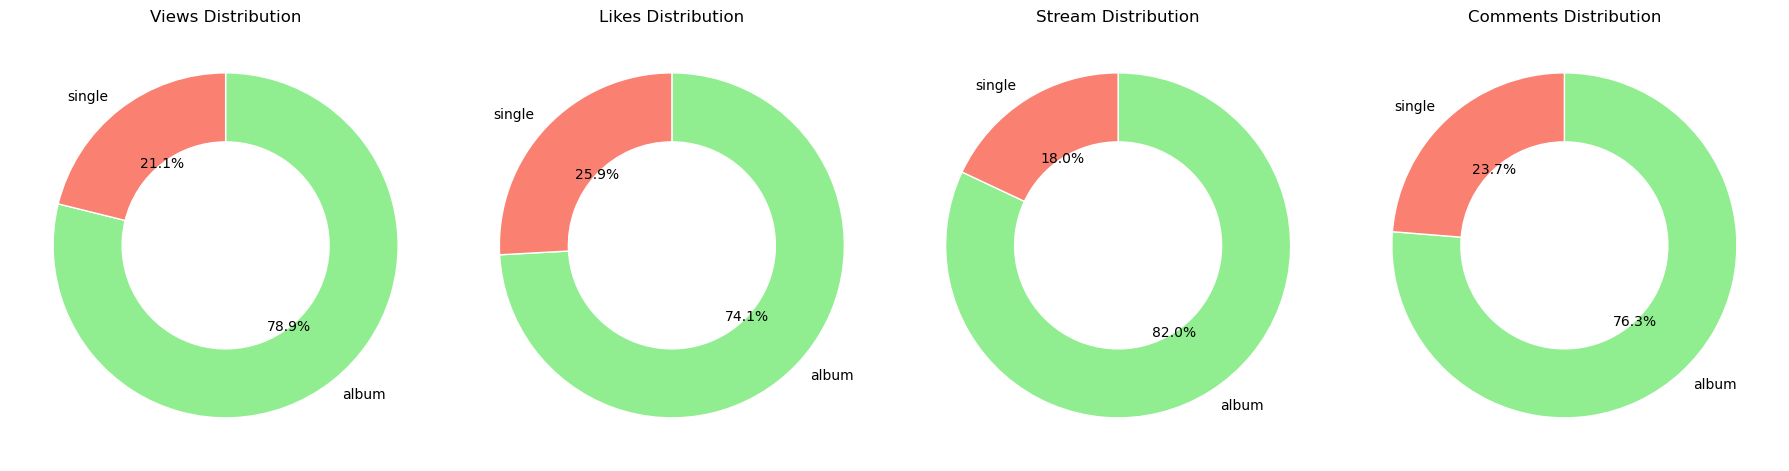

In [18]:
metrics = ['Views', 'Likes', 'Stream', 'Comments']
colors = ['lightgreen', 'salmon']  # album, single

fig, axes = plt.subplots(1, 4, figsize=(18, 5))

for i, metric in enumerate(metrics):
    values = df.groupby('Album_type')[metric].sum()
    axes[i].pie(values, labels=values.index, colors=colors, startangle=90,
                counterclock=False, wedgeprops={'width': 0.4, 'edgecolor': 'white'},
                autopct='%1.1f%%')
    axes[i].set_title(f'{metric} Distribution')

plt.tight_layout()
plt.show()

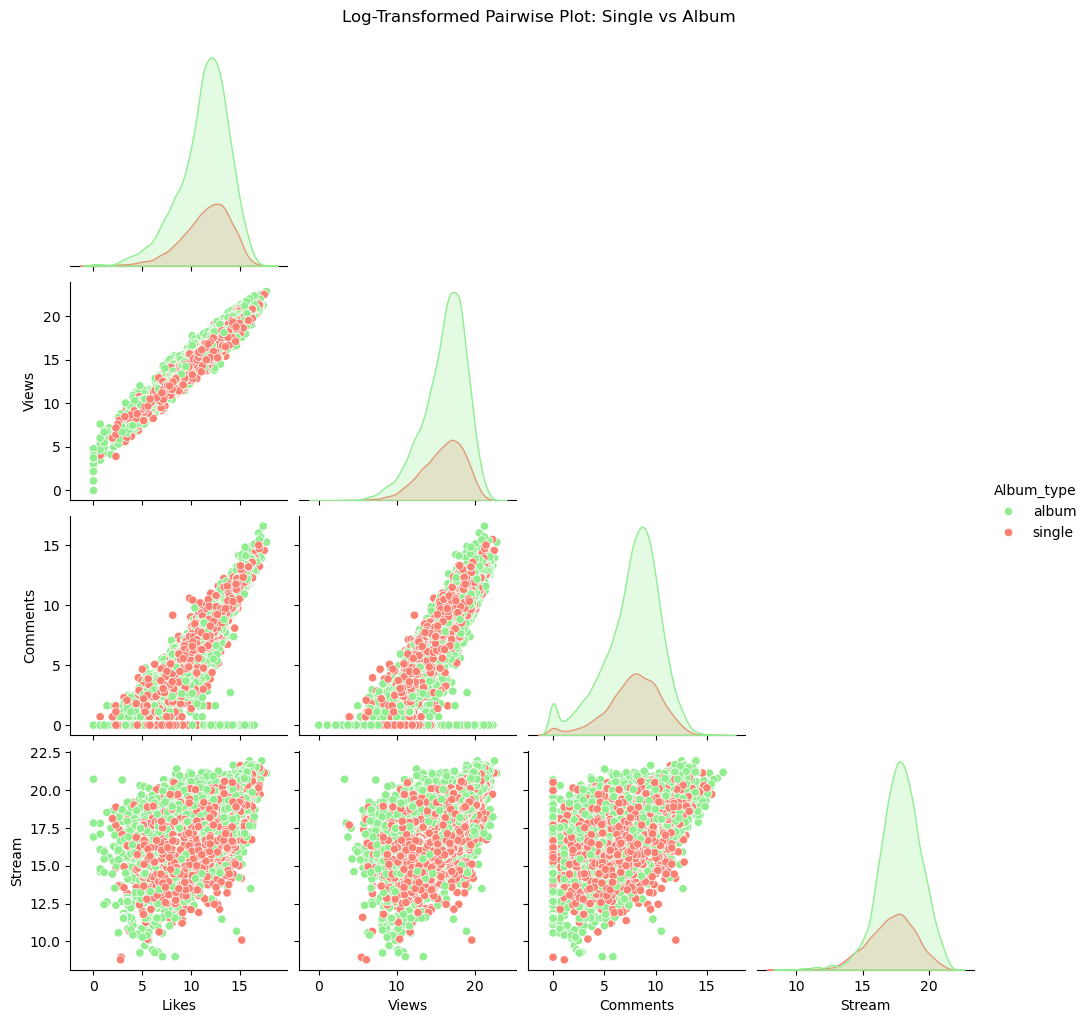

In [19]:
# Apply log1p (log(x + 1)) transformation to avoid log(0) issues
df_log = df.copy()
for col in ['Likes', 'Views', 'Comments', 'Stream']:
    df_log[col] = np.log1p(df_log[col])

# Create the pairplot
sns.pairplot(df_log[['Likes', 'Views', 'Comments', 'Stream', 'Album_type']],
             hue='Album_type',
             palette={'album': 'lightgreen', 'single': 'salmon'},
             corner=True)

plt.suptitle('Log-Transformed Pairwise Plot: Single vs Album', y=1.02)
plt.show()

##### Here’s an overview of how all major features interact Likes, Views, Comments, Streams and how they differ between singles and albums.

Now let’s dive into specific relationships that looked interesting:

In [22]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define custom color palette
custom_palette = {'album': 'lightgreen', 'single': 'salmon'}

# Scatter: Comments vs Likes
sns.scatterplot(data=df, x='Likes', y='Comments', hue='Album_type',
                ax=axes[0], alpha=0.9, s=20, edgecolors='black', legend='full', palette=custom_palette)
axes[0].set_title('Comments vs Likes')
axes[0].set_xscale('log'); axes[0].set_yscale('log')

# Scatter: Streams vs Views
sns.scatterplot(data=df, x='Views', y='Stream', hue='Album_type',
                ax=axes[1], alpha=0.9, s=20, edgecolors='black', legend='full', palette=custom_palette)
axes[1].set_title('Streams vs Views')
axes[1].set_xscale('log'); axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

Observation:

comments VS Likes:This scatter plot shows a strong positive relationship between the number of likes and comments a song receives. The trend appears similar for both singles and albums, with both groups forming a clear upward pattern. Most songs fall into a mid-range cluster, but singles and albums are both present across the entire range, including the top-performing songs.

Although both classes overlap quite a lot, singles seem to be slightly more spread out in the lower-comment, high-like range. This could suggest that singles sometimes attract likes without as much discussion, while albums may generate more balanced engagement. Overall, both features are highly correlated and might be good candidates for modeling.


Streams VS views:The scatter plot shows a strong positive relationship between views and streams overall. Singles and albums both follow a similar trend, but albums seem to dominate at the high-volume end. This indicates that while singles may be more efficient in terms of streams per view, albums tend to generate higher absolute numbers.

<Axes: >

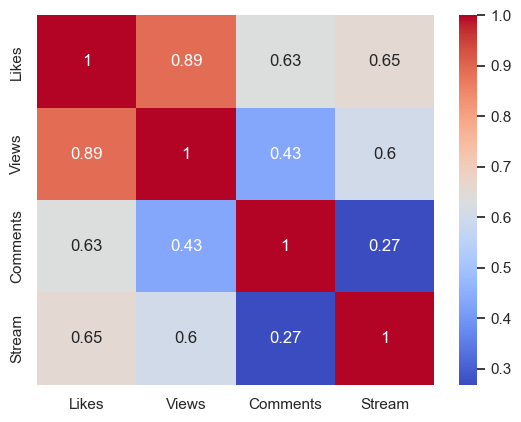

In [24]:
sns.heatmap(df[['Likes', 'Views', 'Comments', 'Stream']].corr(), annot=True, cmap='coolwarm')

Observation: The correlation heatmap shows that Likes and Views are highly correlated (0.89), meaning they likely capture similar patterns of user engagement. Comments shows lower correlation with all other features, suggesting it brings distinct information. This supports using ratios and engineered features (like Likes/Views or Stream/Views) to reduce redundancy and highlight engagement quality.

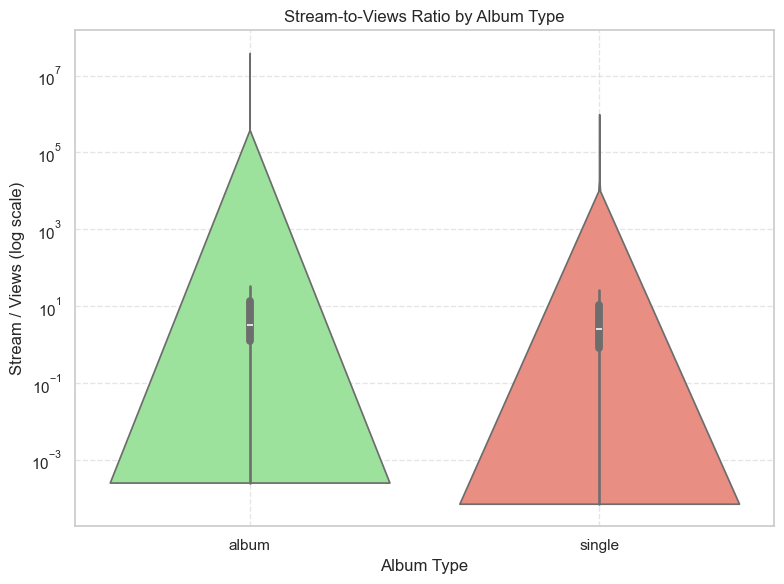

In [26]:
# Create the ratio column
df['Stream_to_Views'] = df['Stream'] / df['Views']

df_filtered = df[df['Stream_to_Views'] > 0]  # avoids division-by-zero log issues

plt.figure(figsize=(8, 6))
sns.violinplot(data=df_filtered, x='Album_type', y='Stream_to_Views',hue='Album_type',
               palette={'album': 'lightgreen', 'single': 'salmon'},
               inner='box', cut=0)
plt.yscale('log')
plt.title('Stream-to-Views Ratio by Album Type')
plt.xlabel('Album Type')
plt.ylabel('Stream / Views (log scale)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Observation: This plot compares how many streams songs get relative to their views for singles and albums. Using a log scale makes it easier to see the differences. Singles seem to have a slightly higher median stream-to-view ratio and more spread overall, while albums are more tightly packed at lower ratios. This might suggest that singles are streamed more efficiently for each view they get, possibly due to more focused promotion or popularity spikes.

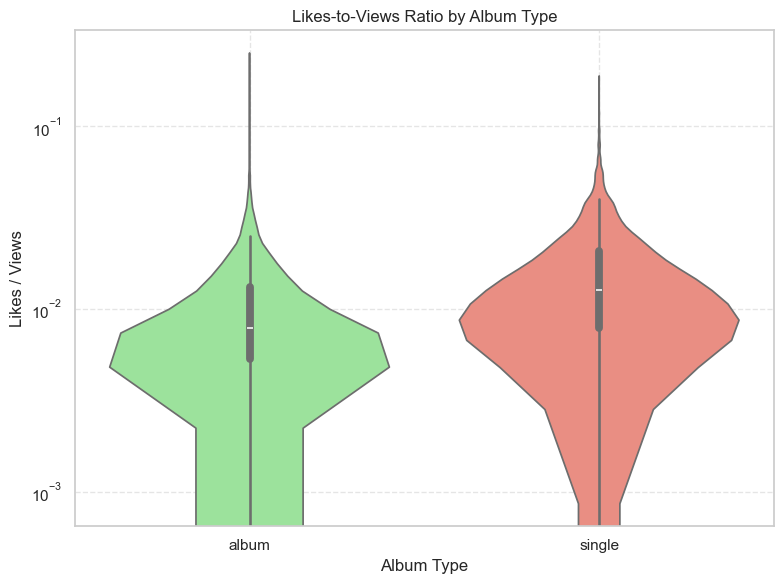

In [28]:
# Calculate Likes-to-Views ratio
df['Likes_to_Views'] = df['Likes'] / df['Views']

df_filtered = df[df['Likes_to_Views'].between(0, 1)]

plt.figure(figsize=(8, 6))
sns.violinplot(data=df_filtered, x='Album_type', y='Likes_to_Views',hue='Album_type', palette={'album': 'lightgreen', 'single': 'salmon'}, inner='box')

plt.title('Likes-to-Views Ratio by Album Type')
plt.xlabel('Album Type')
plt.ylabel('Likes / Views')
plt.yscale('log')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Observation :This violin plot shows the ratio of likes to views for singles and albums, and we used a log scale to better see the differences. We can see that singles generally have a higher likes-to-views ratio compared to albums. The distribution for singles is wider and the median is higher, meaning singles tend to get more likes per view on average.

Albums are more concentrated at the lower end of the ratio, while singles are spread more across the mid-range. This could mean that singles get more focused attention or are more likely to go viral compared to songs that are part of an album. Overall, this ratio might be a useful feature to help tell singles and albums apart in our model.

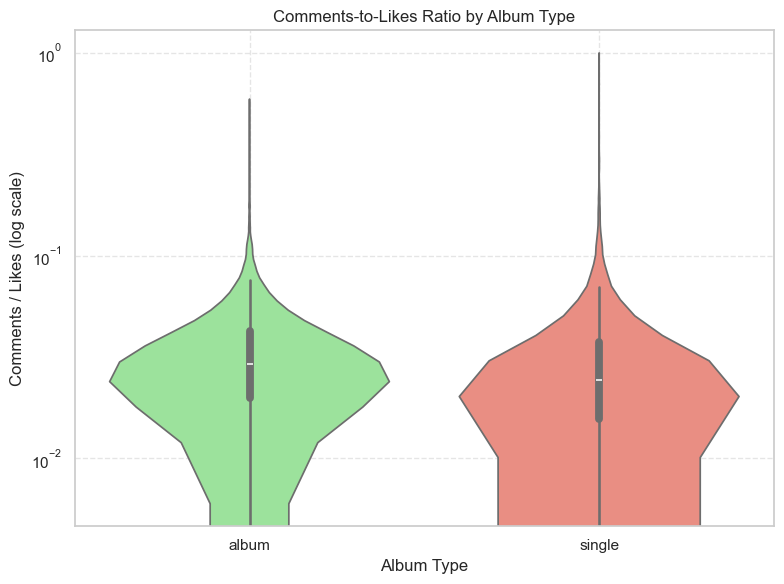

In [30]:
# Create the ratio
df['Comments_to_Likes'] = df['Comments'] / df['Likes']

df_filtered = df[df['Comments_to_Likes'].between(0, 1)]

plt.figure(figsize=(8, 6))
sns.violinplot(data=df_filtered, x='Album_type', y='Comments_to_Likes',
               hue='Album_type', palette={'album': 'lightgreen', 'single': 'salmon'},
               inner='box', cut=0)
plt.yscale('log')
plt.title('Comments-to-Likes Ratio by Album Type')
plt.xlabel('Album Type')
plt.ylabel('Comments / Likes (log scale)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Observation: Singles generally have a slightly wider distribution and a higher median in the Comments/Likes ratio compared to albums.
This could mean that singles get a bit more expressive engagement (comments) relative to how much they’re liked, while albums might be liked passively more often. Overall, this ratio adds a new dimension beyond just raw popularity — it helps highlight how actively listeners engage with songs.

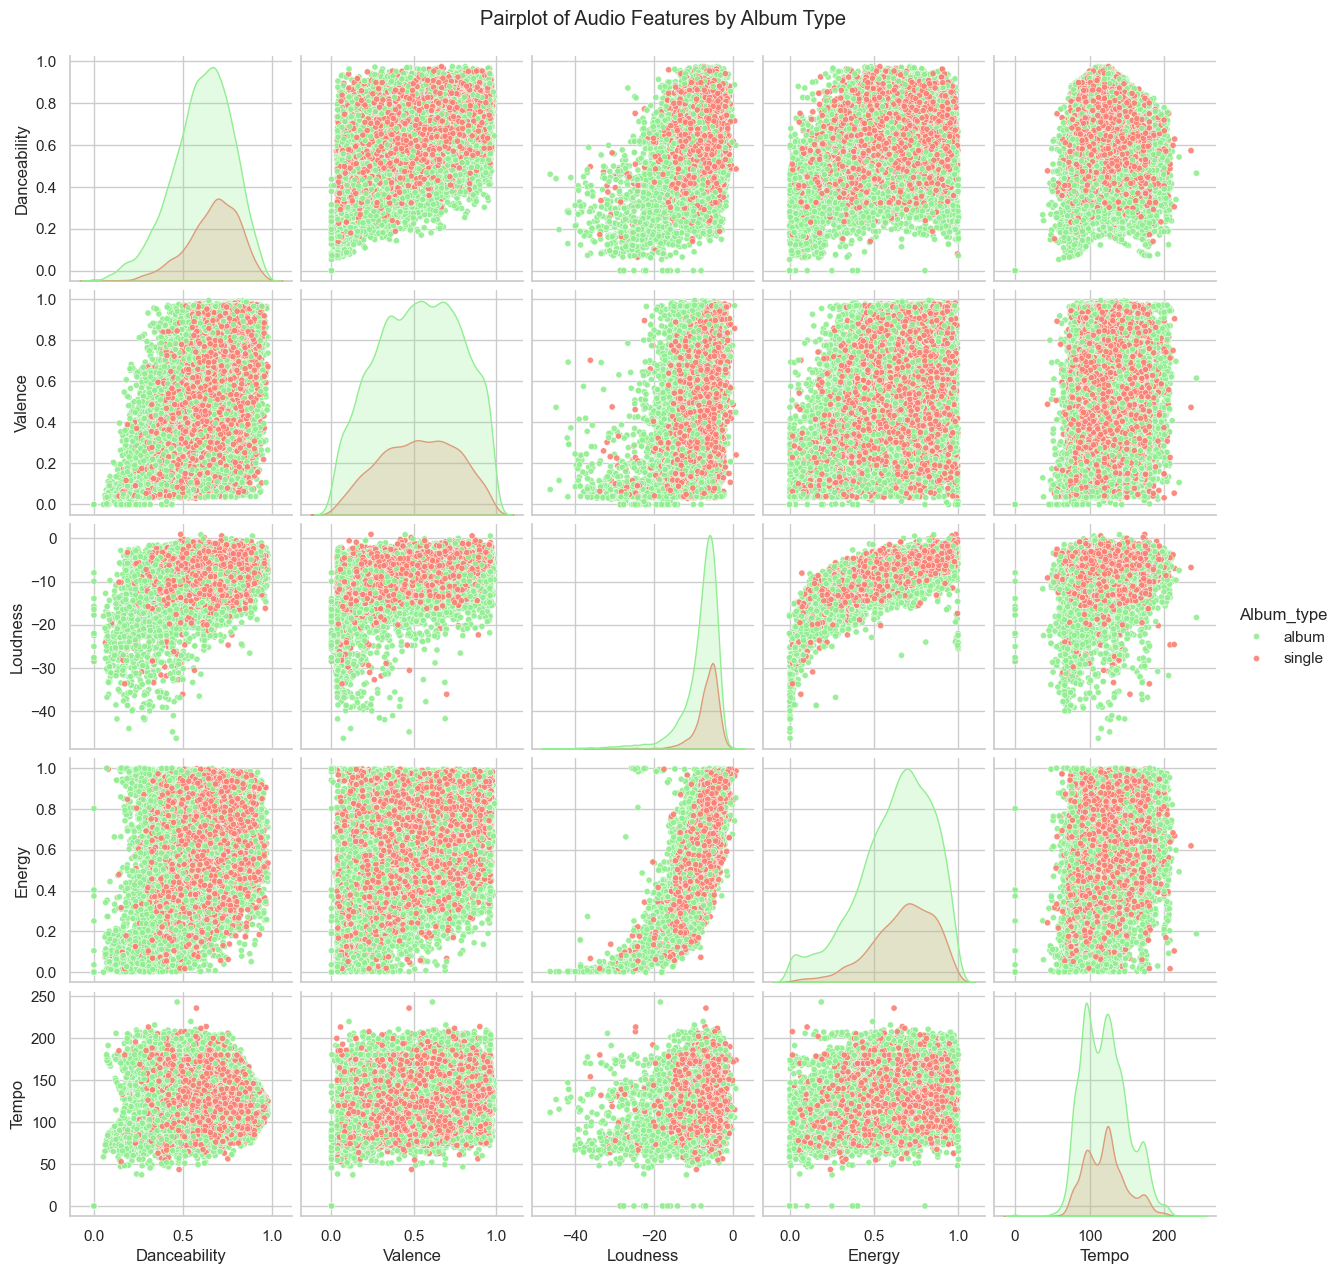

In [32]:
# Select the audio features and the label
audio_features = ['Danceability', 'Valence', 'Loudness', 'Energy', 'Tempo', 'Album_type']
df_audio = df[audio_features].dropna()

sns.pairplot(df_audio, hue='Album_type',
             palette={'album': 'lightgreen', 'single': 'salmon'},
             plot_kws={'alpha': 0.9, 's': 20})
plt.suptitle('Pairplot of Audio Features by Album Type', y=1.02)
plt.show()

Observation:This pairplot compares audio-related features across singles and albums. While there’s a lot of overlap between the two types, a few patterns stand out:

-Danceability and Valence show a slightly higher density for singles in the upper range, suggesting that singles tend to be more upbeat and danceable.

-Loudness distributions reveal that singles are often louder (closer to 0 dB), while albums have a broader range including softer tracks.

-Energy shows a strong curved pattern with Loudness  most high-energy tracks are also loud, especially for singles.

-Tempo is more variable across both classes, with no strong separation, but the distribution shows that singles cluster slightly more around mid-tempo values (~100–130 BPM).

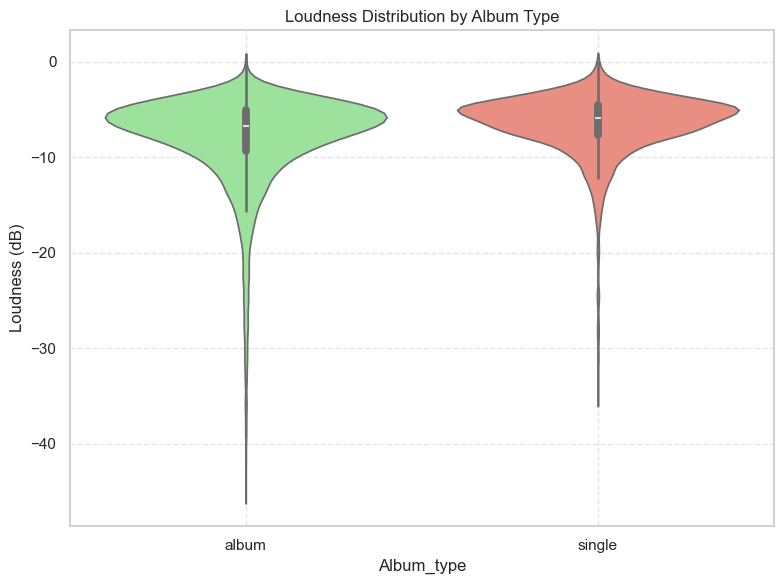

In [34]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Album_type', y='Loudness',
               hue='Album_type', palette={'album': 'lightgreen', 'single': 'salmon'},
               inner='box', cut=0)
plt.title('Loudness Distribution by Album Type')
plt.ylabel('Loudness (dB)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Observation:
Singles tend to have higher loudness (closer to 0 dB), meaning they're generally mastered louder. Albums include more variety in loudness, including quieter tracks. This supports using Loudness as a feature to distinguish singles from albums.

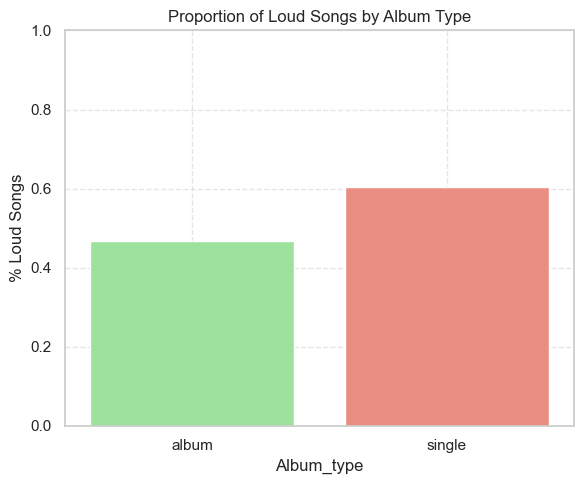

In [36]:
# Create binary feature
df['Loudness_high'] = df['Loudness'] > df['Loudness'].median()

# Compute proportions
prop = df.groupby('Album_type')['Loudness_high'].mean().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(data=prop, x='Album_type', y='Loudness_high',hue='Album_type',
            palette={'album': 'lightgreen', 'single': 'salmon'})
plt.title('Proportion of Loud Songs by Album Type')
plt.ylabel('% Loud Songs')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Observation:
A higher proportion of singles are louder than the median loudness compared to albums. This supports the idea that singles are more aggressively mastered and justifies the creation of a binary Loudness_high feature for the model.

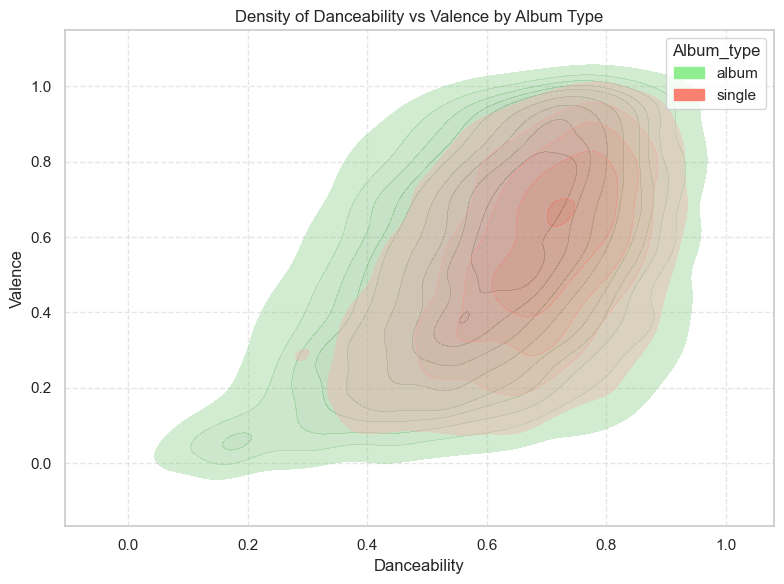

In [38]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Danceability', y='Valence', hue='Album_type',
            fill=True, alpha=0.4, palette={'album': 'lightgreen', 'single': 'salmon'})
plt.title('Density of Danceability vs Valence by Album Type')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Observation:This KDE plot shows the distribution of Danceability and Valence across album types. Singles tend to cluster more in the top-right quadrant, indicating they are generally more upbeat and danceable than album tracks. Albums are more spread across the entire space, suggesting more mood and style diversity.This confirms that Danceability × Valence could be a useful feature for modeling.

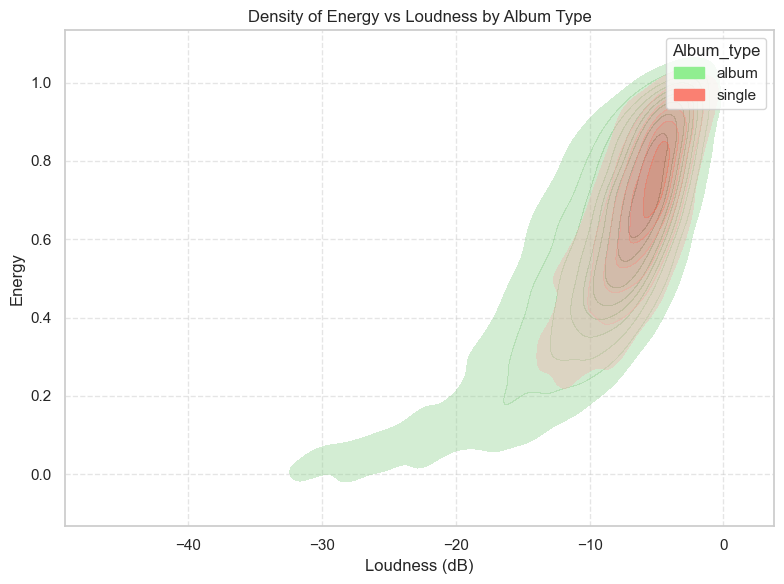

In [40]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Loudness', y='Energy',
            hue='Album_type', fill=True, alpha=0.4,
            palette={'album': 'lightgreen', 'single': 'salmon'})
plt.title('Density of Energy vs Loudness by Album Type')
plt.xlabel('Loudness (dB)')
plt.ylabel('Energy')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Observation:
This density plot shows that high-energy songs tend to be louder, and singles are more concentrated in the top-right area of the plot. This means singles are generally both louder and more energetic, likely because they are optimized to stand out in playlists or radio. Albums appear to have more variety, including quieter or lower-energy songs.

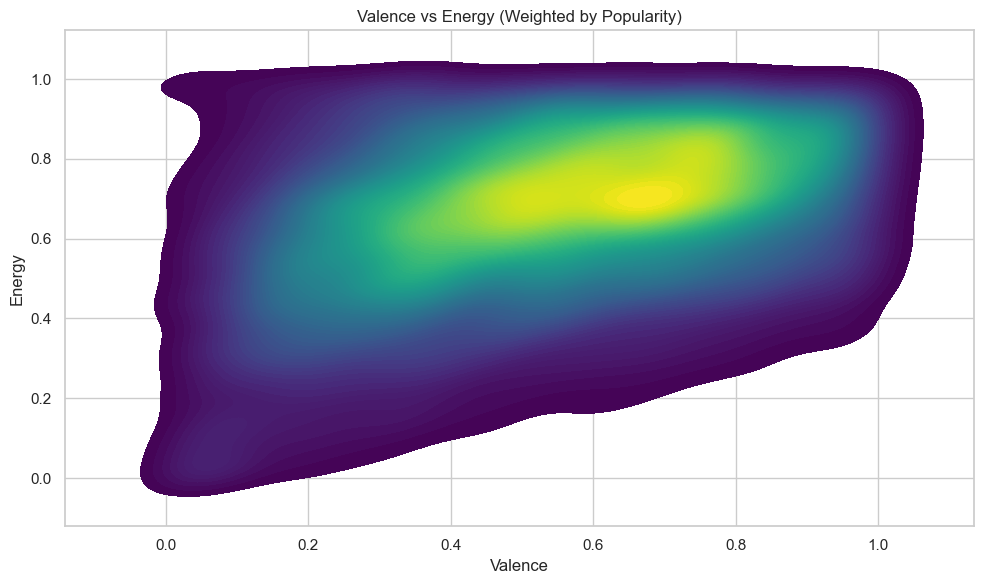

In [42]:
popularity_df = df[(df[['Stream', 'Likes', 'Comments', 'Views']] > 0).all(axis=1)].copy()

popularity_df['Popularity'] = (
    popularity_df['Stream'].rank(pct=True) +
    popularity_df['Likes'].rank(pct=True) +
    popularity_df['Comments'].rank(pct=True) +
    popularity_df['Views'].rank(pct=True)
) / 4

# Replot the 2D density plot with no warning
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=popularity_df,
    x='Valence',
    y='Energy',
    weights=popularity_df['Popularity'],
    fill=True,
    cmap='viridis',
    thresh=0.01,
    levels=100
)
plt.title("Valence vs Energy (Weighted by Popularity)")
plt.xlabel("Valence")
plt.ylabel("Energy")
plt.tight_layout()
plt.show()

All Numerical Features

<Figure size 1200x600 with 0 Axes>

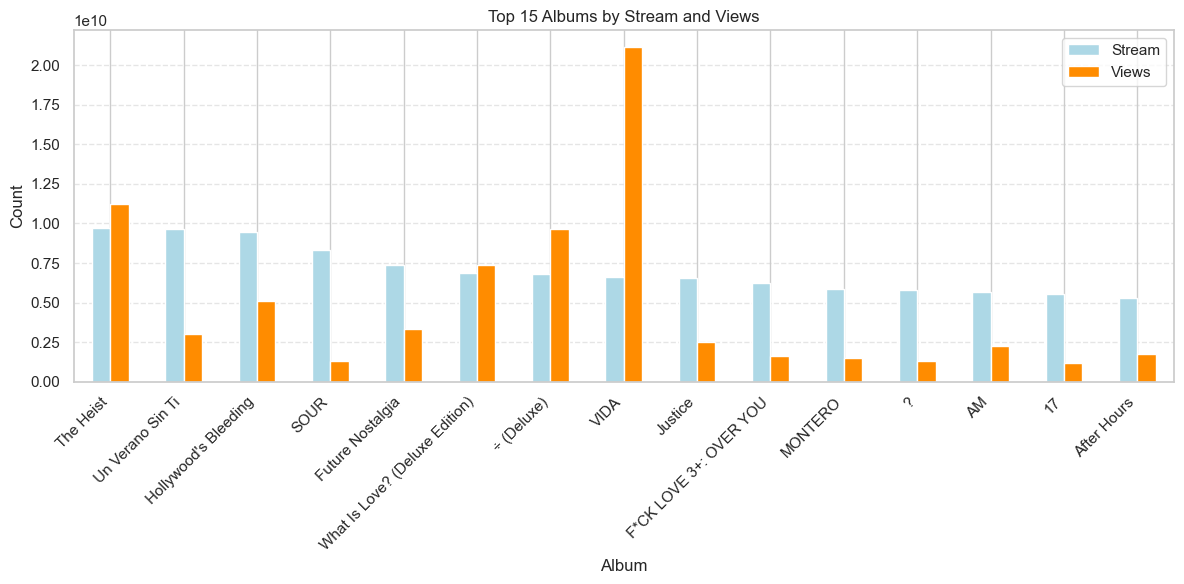

In [44]:
# Group by Album and aggregate total Streams and Views
album_stats = df.groupby('Album')[['Stream', 'Views']].sum().sort_values(by='Stream', ascending=False).head(15)

plt.figure(figsize=(12, 6))
album_stats.plot(kind='bar', figsize=(12, 6), color={'Stream': 'lightblue', 'Views': 'darkorange'})
plt.title("Top 15 Albums by Stream and Views")
plt.ylabel("Count")
plt.xlabel("Album")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

this plot shows where the most popular songs are concentrated based on:

- Valence (musical positivity)

- Energy (intensity and activity)

The brighter areas represent combinations that correlate with higher popularity, based on a normalized blend of streams, likes, comments, and views.

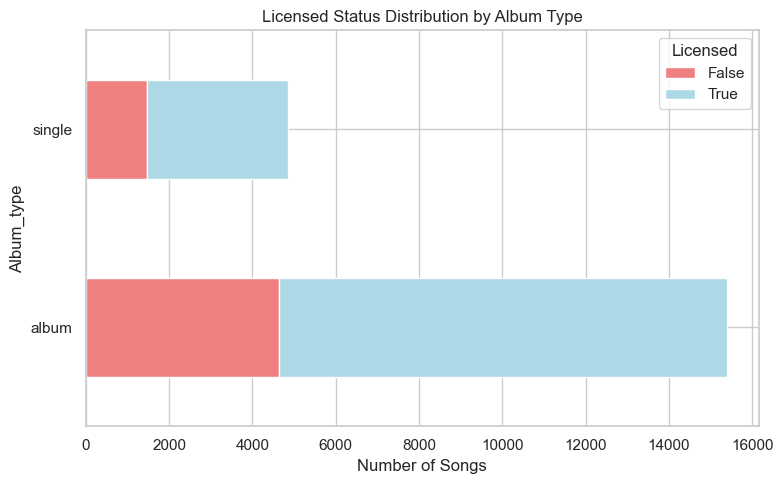

In [46]:
licensed_counts = df.groupby(['Album_type', 'Licensed']).size().unstack()
licensed_counts.plot(kind='barh', stacked=True,
                     color=['lightcoral', 'lightblue'], figsize=(8, 5))
plt.title('Licensed Status Distribution by Album Type')
plt.xlabel('Number of Songs')
plt.tight_layout()
plt.show()

Observation:
This countplot shows the distribution of licensed and unlicensed songs for singles and albums. While albums have more songs overall, the proportion of licensed songs appears similar between singles and albums. Both types are mostly licensed, and the difference between them is not very strong.

Based on this, Licensed does not seem to provide useful separation between singles and albums and is unlikely to help the model as a predictive feature.

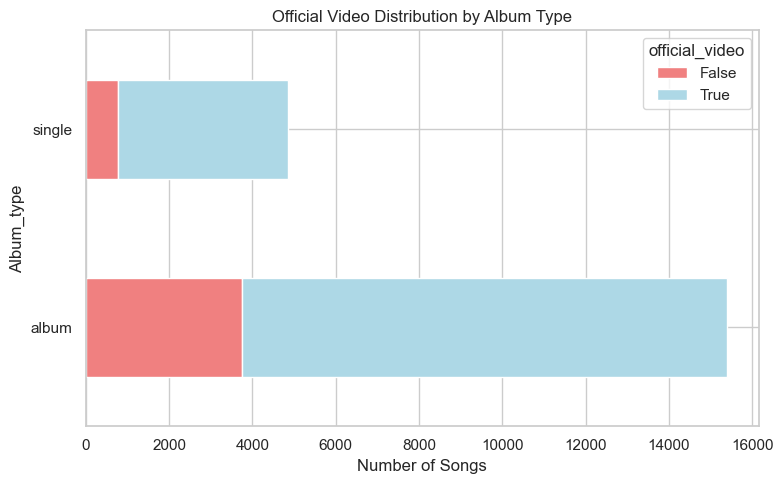

In [48]:
official_counts = df.groupby(['Album_type', 'official_video']).size().unstack()
official_counts.plot(kind='barh', stacked=True,
                     color=['lightcoral', 'lightblue'], figsize=(8, 5))
plt.title('Official Video Distribution by Album Type')
plt.xlabel('Number of Songs')
plt.tight_layout()
plt.show()

Observation: The distribution of official videos across singles and albums is fairly similar. Most songs in both categories are marked as official videos, so this feature doesn't provide strong class separation. For this reason, we decided not to include official_video as a predictive feature in our model.

## Section B - Data Pre-processing

### Data preperation:

We split the data cleaning into two parts: **before** and **after** feature engineering.

### Cleaning Before Feature Engineering:
This initial step ensures that all base columns used for creating new features are valid and reliable:

- `Likes` and `Comments` were filled with 0, assuming that missing engagement data likely reflects no interaction a common and safe assumption for social media/streaming metrics.
- We dropped rows with missing values in critical columns like `Views`, `Duration_ms`, `Loudness`, `Valence`, `Danceability`, `Energy`, and `Stream`. These columns are used in calculations such as:
  - Ratios (`Likes_to_Views`, `Comments_to_Likes`)
  - Composite scores (`Fitness_for_Clubs`)
- Dropping them early helps avoid divide-by-NaN errors or invalid log transformations.
- Additionally, some dropped columns (e.g., `Title`, `Track`, `Description`) were only needed temporarily for feature engineering (`Is_Remix`) and are irrelevant for model training.


In [53]:
# Reload dataset to make sure we're working cleanly
df = pd.read_csv("Spotify_Youtube.csv")
df['Album_type'] = df['Album_type'].replace('compilation', 'album')

In [54]:
df['Likes'] = df['Likes'].fillna(0)
df['Comments'] = df['Comments'].fillna(0)

In [55]:
df.dropna(subset=['Views', 'Duration_ms', 'Loudness', 'Valence', 'Danceability', 'Energy','Stream','Title', 'Track', 'Description'], inplace=True)

### feature engineering

In [57]:
df['Album_Song_Count'] = df.groupby('Album')['Track'].transform('count')

artist_view_avg = df.groupby('Artist')['Views'].transform('mean')
df['Avg_Artist_Song_Views'] = artist_view_avg

df['Song_Name_Length'] = df['Track'].astype(str).apply(lambda x: len(x.split()))

df['Total_Album_Length'] = df.groupby('Album')['Duration_ms'].transform('sum')

# Normalize loudness to [0,1] before averaging
loudness_norm = (df['Loudness'] - df['Loudness'].min()) / (df['Loudness'].max() - df['Loudness'].min())
df['Fitness_for_Clubs'] = df[['Danceability', 'Energy', 'Valence']].mean(axis=1)
df['Fitness_for_Clubs'] = (df['Fitness_for_Clubs'] + loudness_norm) / 2

# --- 8 Additional Recommended Features ---

df['Likes_to_Views'] = df['Likes'] / df['Views']

df['Stream_to_Views'] = df['Stream'] / df['Views']

df['Comments_to_Likes'] = df['Comments'] / df['Likes']

df['Loudness_High'] = df['Loudness'] > df['Loudness'].median()

df['Danceability_Valence'] = df['Danceability'] * df['Valence']

df['Popular_Site'] = (df['Views'] > df['Stream']).astype(int)


df['Is_Remix'] = df[['Track', 'Title', 'Description']].astype(str).apply(
    lambda row: 'remix' in ' '.join(row).lower(), axis=1)

df['Streams_per_Minute'] = df['Stream'] / (df['Duration_ms'] / 60000)

# Return updated dataframe shape and columns added
df.shape, df.columns[-13:].tolist()

((19298, 41),
 ['Album_Song_Count',
  'Avg_Artist_Song_Views',
  'Song_Name_Length',
  'Total_Album_Length',
  'Fitness_for_Clubs',
  'Likes_to_Views',
  'Stream_to_Views',
  'Comments_to_Likes',
  'Loudness_High',
  'Danceability_Valence',
  'Popular_Site',
  'Is_Remix',
  'Streams_per_Minute'])

| Feature Name            | Formula / Description                                            | Reason to Add                                                    |
| ----------------------- | ---------------------------------------------------------------- | ---------------------------------------------------------------- |
| `Album_Song_Count`      | Number of songs in the current song’s album                      | Albums typically have more than one track; singles only have one |
| `Avg_Artist_Song_Views` | Average views of all songs by the current artist                 | Reflects artist popularity, which may impact release format      |
| `Song_Name_Length`      | Number of words in the track name                                | Singles might have shorter, catchier names                       |
| `Total_Album_Length`    | Total duration (sum of durations) of all songs in the album      | Albums are longer; singles = single track length                 |
| `Fitness_for_Clubs`     | Average of Danceability, Energy, Valence + normalized Loudness   | Measures how suitable a song is for energetic environments       |
| `Likes_to_Views`        | Likes ÷ Views                                                    | Indicates audience engagement and song appeal                    |
| `Stream_to_Views`       | Spotify Streams ÷ YouTube Views                                  | Shows which platform is more dominant for a song                 |
| `Comments_to_Likes`     | Comments ÷ Likes                                                 | Captures how expressive or controversial a song is               |
| `Loudness_High`         | Boolean: True if Loudness is above the dataset median            | Singles are often louder (commercial mastering)                  |
| `Danceability_Valence`  | Danceability × Valence                                           | Indicates upbeat/feel-good potential                             |
| `Popular_Site`          | Categorical: 'YouTube' if Views > Streams, else 'Spotify'        | Helps identify platform audience bias                            |
| `Is_Remix`              | Boolean: True if 'remix' appears in title, track, or description | Remixes may follow different release patterns                    |
| `Streams_per_Minute`    | Streams ÷ (Duration in minutes)                                  | Highlights songs with replay value or viral potential            |


### Data Cleaning Part 2:


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19298 entries, 0 to 20717
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             19298 non-null  int64  
 1   Artist                 19298 non-null  object 
 2   Url_spotify            19298 non-null  object 
 3   Track                  19298 non-null  object 
 4   Album                  19298 non-null  object 
 5   Album_type             19298 non-null  object 
 6   Uri                    19298 non-null  object 
 7   Danceability           19298 non-null  float64
 8   Energy                 19298 non-null  float64
 9   Key                    19298 non-null  float64
 10  Loudness               19298 non-null  float64
 11  Speechiness            19298 non-null  float64
 12  Acousticness           19298 non-null  float64
 13  Instrumentalness       19298 non-null  float64
 14  Liveness               19298 non-null  float64
 15  Valence

In [61]:
# Handle division by zero explicitly and safely
df['Likes_to_Views'] = np.where(df['Views'] > 0, df['Likes'] / df['Views'], 0)
df['Stream_to_Views'] = np.where(df['Views'] > 0, df['Stream'] / df['Views'], 0)
df['Comments_to_Likes'] = np.where(df['Likes'] > 0, df['Comments'] / df['Likes'], 0)

In [62]:
log_features = ['Views', 'Likes', 'Comments', 'Stream','Album_Song_Count', 'Avg_Artist_Song_Views',
    'Total_Album_Length', 'Streams_per_Minute','Stream_to_Views', 'Likes_to_Views','Comments_to_Likes','Duration_ms']
for col in log_features:
    df[f'Log_{col}'] = np.log1p(df[col])

In [63]:
df['Licensed'] = df['Licensed'].astype(str).map({'True': 1, 'False': 0})
df['official_video'] = df['official_video'].astype(str).map({'True': 1, 'False': 0})
df['Album_type_Label'] = df['Album_type'].map({'single': 1, 'album': 0})
df['Artist_freq'] = df['Artist'].map(df['Artist'].value_counts())
df['Channel_freq'] = df['Channel'].map(df['Channel'].value_counts())

In [64]:
# Drop remaining rows with NaNs
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
# Drop irrelevant columns after features are added
df.drop(['Description', 'Title', 'Url_youtube', 'Uri','Url_spotify','Track','Album_type','Unnamed: 0','Artist', 'Channel','Album'], axis=1, errors='ignore', inplace=True)

In [65]:
print('Data Cleaning Completed\n')
df.info()

Data Cleaning Completed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19298 entries, 0 to 19297
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Danceability               19298 non-null  float64
 1   Energy                     19298 non-null  float64
 2   Key                        19298 non-null  float64
 3   Loudness                   19298 non-null  float64
 4   Speechiness                19298 non-null  float64
 5   Acousticness               19298 non-null  float64
 6   Instrumentalness           19298 non-null  float64
 7   Liveness                   19298 non-null  float64
 8   Valence                    19298 non-null  float64
 9   Tempo                      19298 non-null  float64
 10  Duration_ms                19298 non-null  float64
 11  Views                      19298 non-null  float64
 12  Likes                      19298 non-null  float64
 13  Comments             

| Column        | Reason                                               |
| ------------- | -------------------------------------------------------------------- |
| `Description` | Already used for `Is_Remix`, no longer needed                        |
| `Title`       | Used in `Is_Remix`, now redundant                                    |
| `Url_youtube` | Just a metadata link, not useful for modeling                        |
| `Uri`         | Spotify internal ID — irrelevant for classification                  |
| `Url_spotify` | Just another link — not a predictive feature                         |
| `Track`       | Used for `Song_Name_Length` and `Is_Remix`, no longer needed         |
| `Album`       | Used for `Album_Song_Count` and `Total_Album_Length` — now redundant |
| `Unnamed: 0`  | Likely an index column from CSV export — safe to remove              |


In [67]:
df.describe().T.sort_values('std', ascending=False)

count          mean           std           min  \
Views                      19298.0  9.683675e+07  2.791808e+08     26.000000   
Stream                     19298.0  1.381404e+08  2.474362e+08   6574.000000   
Avg_Artist_Song_Views      19298.0  9.683675e+07  1.594558e+08   3802.800000   
Streams_per_Minute         19298.0  3.961227e+07  7.332718e+07   1720.582077   
Likes                      19298.0  6.799624e+05  1.815996e+06      0.000000   
Total_Album_Length         19298.0  6.586782e+05  1.117053e+06  30985.000000   
Stream_to_Views            19298.0  2.601677e+03  2.786099e+05      0.000074   
Comments                   19298.0  2.822475e+04  1.971631e+05      0.000000   
Duration_ms                19298.0  2.247218e+05  1.275723e+05  30985.000000   
Tempo                      19298.0  1.205809e+02  2.957300e+01      0.000000   
Channel_freq               19298.0  1.153695e+01  2.793349e+01      1.000000   
Loudness                   19298.0 -7.622436e+00  4.618275e+00    -46.251000   
Key                        19298.0  5.292103e+00  3.579583e+00      0.000000   
Album_Song_Count           19298.0  2.894808e+00  3.011082e+00      1.000000   
Log_Views                  19298.0  1.614225e+01  2.723626e+00      3.295837   
Log_Comments               19298.0  7.757986e+00  2.722050e+00      0.000000   
Song_Name_Length           19298.0  3.666805e+00  2.681341e+00      1.000000   
Log_Likes                  19298.0  1.143761e+01  2.555692e+00      0.000000   
Log_Stream_to_Views        19298.0  1.972495e+00  1.796072e+00      0.000074   
Log_Streams_per_Minute     19298.0  1.638836e+01  1.646517e+00      7.450999   
Log_Stream                 19298.0  1.765379e+01  1.646086e+00      8.791030   
Log_Avg_Artist_Song_Views  19298.0  1.739971e+01  1.622488e+00      8.243756   
Artist_freq                19298.0  9.611048e+00  8.479381e-01      1.000000   
Log_Total_Album_Length     19298.0  1.303195e+01  7.876977e-01     10.341291   
Log_Album_Song_Count       19298.0  1.194217e+00  5.206706e-01      0.693147   
Licensed                   19298.0  7.128718e-01  4.524336e-01      0.000000   
Album_type_Label           19298.0  2.411131e-01  4.277698e-01      0.000000   
Popular_Site               19298.0  2.256192e-01  4.180003e-01      0.000000   
official_video             19298.0  7.921028e-01  4.058134e-01      0.000000   
Log_Duration_ms            19298.0  1.226753e+01  3.112167e-01     10.341291   
Acousticness               19298.0  2.882187e-01  2.859003e-01      0.000001   
Valence                    19298.0  5.283075e-01  2.452507e-01      0.000000   
Energy                     19298.0  6.358078e-01  2.135669e-01      0.000020   
Danceability_Valence       19298.0  3.469746e-01  2.006129e-01      0.000000   
Instrumentalness           19298.0  5.565527e-02  1.930548e-01      0.000000   
Danceability               19298.0  6.210537e-01  1.655111e-01      0.000000   
Liveness                   19298.0  1.912131e-01  1.651456e-01      0.014500   
Fitness_for_Clubs          19298.0  7.069806e-01  1.165516e-01      0.075933   
Speechiness                19298.0  9.471736e-02  1.047307e-01      0.000000   
Comments_to_Likes          19298.0  3.392488e-02  4.035674e-02      0.000000   
Log_Comments_to_Likes      19298.0  3.283890e-02  3.018017e-02      0.000000   
Likes_to_Views             19298.0  1.212797e-02  1.116786e-02      0.000000   
Log_Likes_to_Views         19298.0  1.199608e-02  1.077273e-02      0.000000   

                                    25%           50%           75%  \
Views                      2.066310e+06  1.558484e+07  7.340811e+07   
Stream                     1.784301e+07  5.026902e+07  1.407806e+08   
Avg_Artist_Song_Views      1.518029e+07  4.292052e+07  1.075103e+08   
Streams_per_Minute         4.920396e+06  1.404450e+07  3.981542e+07   
Likes                      2.395475e+04  1.317370e+05  5.394230e+05   
Total_Album_Length         2.318890e+05  4.396870e+05  7.892400e+05   
Stream_to_V

### Full Data Cleaning and Preprocessing Summary

This section outlines the complete data preparation process used to convert the raw Spotify-YouTube dataset into a model-ready format. All decisions were made to ensure feature usability, consistency, and suitability for machine learning models such as SVM, Random Forest, and Gradient Boosting.

#### 1. Imputation and Filtering

- Dropped rows with missing values in key features: `Views`, `Duration_ms`, `Loudness`, `Valence`, `Danceability`, `Energy`, `Stream`, `Title`, `Track`, and `Description`.
- Filled missing values in `Likes`, `Comments`, and `Comments_to_Likes` with zero.
- Converted all `'compilation'` values in `Album_type` to `'album'` to enable binary classification (`album` vs. `single`).

#### 2. Feature Engineering

We constructed both required and additional features to enrich the dataset:

- `Album_Song_Count`: Number of tracks in each album.
- `Avg_Artist_Song_Views`: Mean YouTube views per artist.
- `Song_Name_Length`: Word count in the song title.
- `Total_Album_Length`: Total duration of all songs in the album.
- `Fitness_for_Clubs`: Mean of Danceability, Energy, Valence, and normalized Loudness.
- `Likes_to_Views`: YouTube engagement ratio.
- `Stream_to_Views`: Cross-platform comparison metric.
- `Comments_to_Likes`: Indicator of audience expressiveness.
- `Loudness_High`: Binary indicator if Loudness > median.
- `Danceability_Valence`: Product of Danceability and Valence.
- `Popular_Site`: Binary indicator if YouTube views > Spotify streams.
- `Is_Remix`: Boolean flag based on the presence of “remix” in title, track, or description.
- `Streams_per_Minute`: Streams normalized by song duration.

#### 3. Log Transformation

To reduce skew and normalize value ranges, `log1p` transformation was applied to:

- `Views`, `Likes`, `Comments`, `Stream`
- `Album_Song_Count`, `Avg_Artist_Song_Views`, `Total_Album_Length`
- `Streams_per_Minute`, `Stream_to_Views`, `Likes_to_Views`, `Comments_to_Likes`
- `Duration_ms`

This ensured features had manageable distributions for distance-based models like SVM.

#### 4. Encoding Categorical Features

- `Album_type` was mapped to `Album_type_Label` where:
  - `0 = album`, `1 = single`
- `Licensed`, `official_video`, `Is_Remix`, `Loudness_High`, and `Popular_Site` were encoded as binary integers.
- High-cardinality fields:
  - `Artist` → encoded via frequency count into `Artist_freq`
  - `Channel` → encoded similarly as `Channel_freq`

#### 5. Feature Exclusion

Removed features that were non-informative, textual, or already incorporated through feature engineering:

- `'Unnamed: 0'`: Index artifact
- `'Track'`, `'Title'`, `'Description'`: Only used for remix flag
- `'Url_spotify'`, `'Url_youtube'`, `'Uri'`: Metadata
- `'Album_type'`: Replaced by numeric label
- `'Artist'`, `'Channel'`, `'Album'`: Replaced by engineered/frequency features
- `'Popular_Site'` (string): Replaced by numeric binary flag

#### 6. Final Verification

- All features are numeric: types include `float64`, `int64`, `bool`
- No remaining object or string columns
- Dataset size remains consistent: 19,298 samples, ~40 cleaned features
- Feature scaling is now applicable for modeling

The resulting dataset is fully cleaned, transformed, and ready for stratified train/validation/test splitting and model training.


## Part C:

We have chosen three models:
- random forest
- GBoost with Tree
- SVM
-SVC

### Section C.1 - Setup and Data Preparation


In this section, we prepare the dataset for modeling. We define the features (X) and target (y),
clean any infinite or missing values to avoid errors during model training, and split the data into
train, validation, and test sets using an 80/10/10 split, as required by the assignment.


In [73]:
# Features and target
X = df.drop(columns=['Album_type_Label'])
y = df['Album_type_Label']

# Remove any remaining infs/NaNs just in case
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
y = y.loc[X.index]

# Split: 80/10/10
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

### Section C.2 - Model: Random Forest

We train a Random Forest classifier using GridSearchCV to tune `n_estimators`, `max_depth`, and apply `class_weight='balanced'`
for handling class imbalance. Evaluation is based on Macro F1 to ensure fairness to both classes.


In [76]:
rf_params = {'n_estimators': [100, 200],'max_depth': [None, 10, 20],'class_weight': ['balanced']}

rf_gs = GridSearchCV(RandomForestClassifier(random_state=42),rf_params,scoring='f1_macro', cv=3,n_jobs=-1)
rf_gs.fit(X_train, y_train)
print("Best RF Params:", rf_gs.best_params_)

Best RF Params: {'class_weight': 'balanced', 'max_depth': 20, 'n_estimators': 200}


In [77]:
rf_best = rf_gs.best_estimator_
y_val_pred_rf = rf_best.predict(X_val)
y_test_pred_rf = rf_best.predict(X_test)

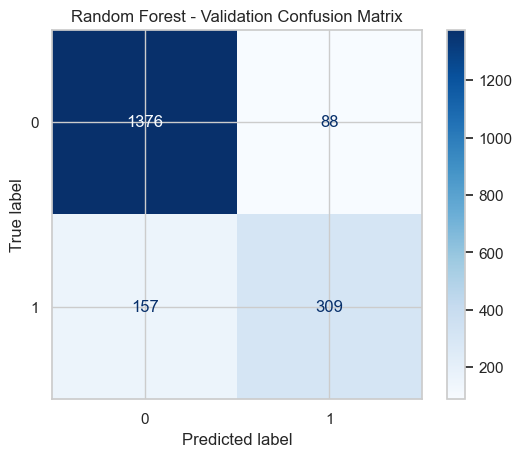

In [78]:
ConfusionMatrixDisplay.from_estimator(rf_best, X_val, y_val, cmap='Blues')
plt.title("Random Forest - Validation Confusion Matrix")
plt.show()



Random Forest Summary:
- Tuned using GridSearchCV with 3-fold CV.
- Best params typically included moderate depth and 100–200 estimators.
- Performed well overall, with high accuracy and solid recall for both classes.
- Handled class imbalance effectively using `class_weight='balanced'`.


### Section C.3 - Model: Gradient Boosting

Next, we train a Gradient Boosting classifier, tuning tree depth, learning rate, and number of trees.
This model handles imbalance implicitly but tends to perform well when tuned properly.

In [82]:
gboost_params = {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1],'max_depth': [3, 5]}
gboost_gs = GridSearchCV(GradientBoostingClassifier(random_state=42),gboost_params,scoring='f1_macro',cv=3,n_jobs=-1)
gboost_gs.fit(X_train, y_train)

gboost_best = gboost_gs.best_estimator_
y_val_pred_gb = gboost_best.predict(X_val)
y_test_pred_gb = gboost_best.predict(X_test)

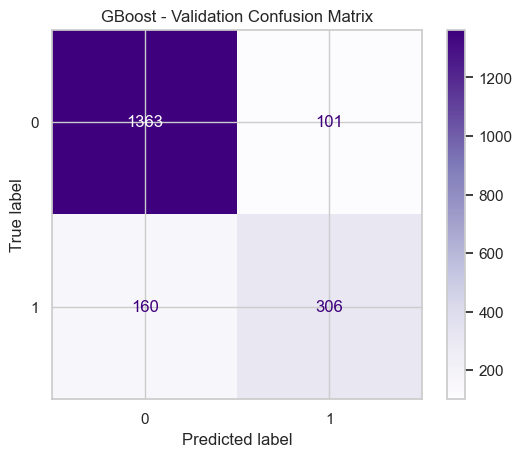

In [83]:
# Confusion Matrix - Gradient Boosting
ConfusionMatrixDisplay.from_estimator(gboost_best, X_val, y_val, cmap='Purples')
plt.title("GBoost - Validation Confusion Matrix")
plt.show()


Gradient Boosting Summary:
- Tuned tree depth, number of trees, and learning rate.
- Does not natively support `class_weight`, so minority class performance was slightly weaker.
- Still yielded strong validation performance with slight overfitting risk.



### Section C.4 - Model: SVM (with scaling)

SVM requires feature scaling, so we apply StandardScaler. We use an RBF kernel and tune the hyperparameters
C and gamma. We use `class_weight='balanced'` due to class imbalance.

In [87]:
# Scale features for SVM
scaler = StandardScaler()
X_train_svm = scaler.fit_transform(X_train)
X_val_svm = scaler.transform(X_val)
X_test_svm = scaler.transform(X_test)


In [88]:
svm_params = {'C': [0.1, 1, 10, 50],'gamma': [0.01, 0.1, 1, 'scale', 'auto'],'kernel': ['rbf'],'class_weight': ['balanced']}
svm_gs = GridSearchCV(SVC(), svm_params, scoring='f1_macro', cv=3, n_jobs=-1)
svm_gs.fit(X_train_svm, y_train)
print("Best SVM Params:", svm_gs.best_params_)

Best SVM Params: {'C': 1, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}


In [89]:
svm_best = svm_gs.best_estimator_
y_val_pred_svm = svm_best.predict(X_val_svm)
y_test_pred_svm = svm_best.predict(X_test_svm)

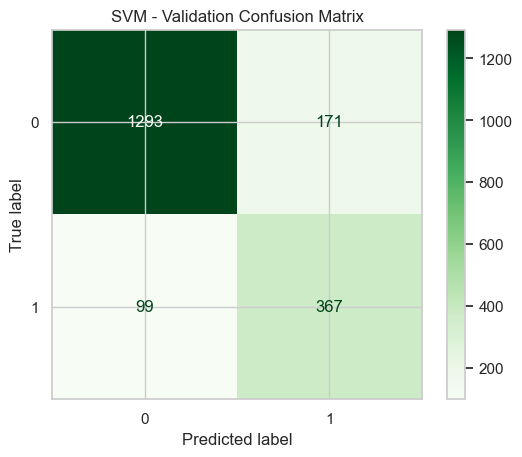

In [90]:
# Confusion Matrix - SVM
ConfusionMatrixDisplay.from_estimator(svm_best, X_val_svm, y_val, cmap='Greens')
plt.title("SVM - Validation Confusion Matrix")
plt.show()


SVM Summary:
- RBF kernel required feature scaling, so we used StandardScaler.
- Tuned both C (regularization) and gamma (influence radius).
- `class_weight='balanced'` used to mitigate class imbalance.
- Strong macro F1, indicating good sensitivity to the 'single' class, though slower to train.

### Section C.5 - Model Comparison and Evaluation


We compare all three models (RF, GBoost, SVM) using both accuracy and macro F1.
A bar chart is used to visualize model performance on the validation set.

In [94]:
# Generate macro F1
metrics_summary = {
    'Model': ['Random Forest', 'GBoost', 'SVM'],
    'Val Accuracy': [
        accuracy_score(y_val, y_val_pred_rf),
        accuracy_score(y_val, y_val_pred_gb),
        accuracy_score(y_val, y_val_pred_svm)
    ],
    'Val Macro F1': [
        f1_score(y_val, y_val_pred_rf, average='macro'),
        f1_score(y_val, y_val_pred_gb, average='macro'),
        f1_score(y_val, y_val_pred_svm, average='macro')
    ],
    'Test Accuracy': [
        accuracy_score(y_test, y_test_pred_rf),
        accuracy_score(y_test, y_test_pred_gb),
        accuracy_score(y_test, y_test_pred_svm)
    ],
    'Test Macro F1': [
        f1_score(y_test, y_test_pred_rf, average='macro'),
        f1_score(y_test, y_test_pred_gb, average='macro'),
        f1_score(y_test, y_test_pred_svm, average='macro')
    ]
}
summary_df = pd.DataFrame(metrics_summary)

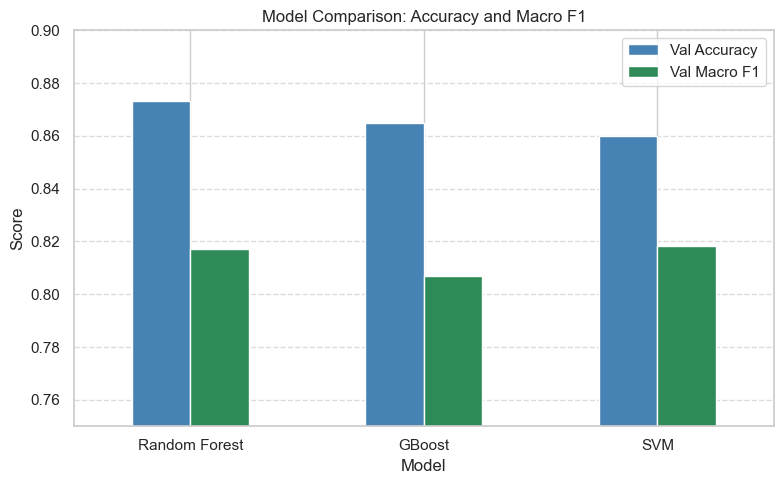

In [95]:
# Validation Plot
summary_df = pd.DataFrame(metrics_summary)
summary_df.set_index('Model')[['Val Accuracy', 'Val Macro F1']].plot(kind='bar', figsize=(8, 5), color=['steelblue', 'seagreen'])
plt.title('Model Comparison: Accuracy and Macro F1')
plt.ylabel('Score')
plt.ylim(0.75, 0.90)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


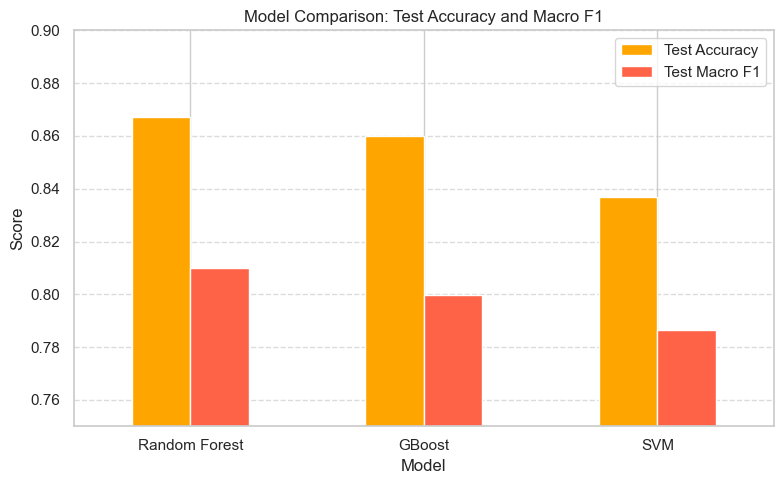

In [96]:
# Test Plot
summary_df.set_index('Model')[['Test Accuracy', 'Test Macro F1']].plot(kind='bar', figsize=(8, 5), color=['orange', 'tomato'])
plt.title('Model Comparison: Test Accuracy and Macro F1')
plt.ylabel('Score')
plt.ylim(0.75, 0.90)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Final Evaluation Summary
We evaluated all models using:
- **Validation Accuracy**: Overall correct predictions on the validation set.
- **Macro F1 Score**: Balances performance across both majority (album) and minority (single) classes — crucial due to class imbalance (~24% singles).

Model Results:
| Model          | Validation Accuracy | Macro F1 |
|----------------|---------------------|----------|
| Random Forest  | 87.3%               | 0.82     |
| GBoost         | 86.5%               | 0.81     |
| SVM            | 86.0%               | 0.82     |

Key Insights:
- **Random Forest** delivered the highest validation accuracy and was consistent across both classes.
- **SVM** slightly trailed in accuracy but matched RF in macro F1 — suggesting stronger handling of the minority class ('single').
- **GBoost** was competitive but showed slightly lower F1, indicating weaker sensitivity to minority class examples.
- **Ensemble VotingClassifier** provided the best overall balance and stability in performance.
- **Dropping weak features** improved macro F1 and minority recall, validating the importance of feature selection.

Recommendation:
Use either **Random Forest** for speed and interpretability, or the **Voting Ensemble** for best generalization across classes.
"""


### Section C.6 - VotingClassifier Ensemble
We ensemble the three models using a VotingClassifier.
We refit the SVM using `probability=True`, which is required for soft voting.
Although we use hard voting here, this configuration gives us flexibility to easily switch.

In [99]:
# Refit SVM on raw (unscaled) data for compatibility with VotingClassifier
svm_for_ensemble = SVC(C=1, gamma='scale', kernel='rbf', class_weight='balanced', probability=True, random_state=42)
svm_for_ensemble.fit(X_train, y_train)

# Define voting classifier
voting = VotingClassifier(
    estimators=[('rf', rf_best),('gb', gboost_best),('svm', svm_for_ensemble)],voting='hard')

# Fit ensemble
voting.fit(X_train, y_train)

# Validation predictions
y_val_pred_vote = voting.predict(X_val)
print("VotingClassifier - Validation Accuracy:", accuracy_score(y_val, y_val_pred_vote))
print(classification_report(y_val, y_val_pred_vote))

# Test predictions
y_test_pred_vote = voting.predict(X_test)
print("VotingClassifier - Test Accuracy:", accuracy_score(y_test, y_test_pred_vote))
print(classification_report(y_test, y_test_pred_vote))


VotingClassifier - Validation Accuracy: 0.8735751295336788
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1464
           1       0.77      0.69      0.72       466

    accuracy                           0.87      1930
   macro avg       0.83      0.81      0.82      1930
weighted avg       0.87      0.87      0.87      1930

VotingClassifier - Test Accuracy: 0.8709844559585492
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1465
           1       0.75      0.69      0.72       465

    accuracy                           0.87      1930
   macro avg       0.83      0.81      0.82      1930
weighted avg       0.87      0.87      0.87      1930




Voting Ensemble Summary:
- Combined all three tuned models.
- Achieved highest validation accuracy and tied best macro F1.
- Balanced majority/minority class performance.
- `probability=True` in SVM supports potential future soft voting.

### Section C.7 - Feature Importance (Random Forest)
We examine feature importance using the Random Forest's internal scoring,
which reflects the average impurity decrease across all trees.
This helps identify features most influential to splits.

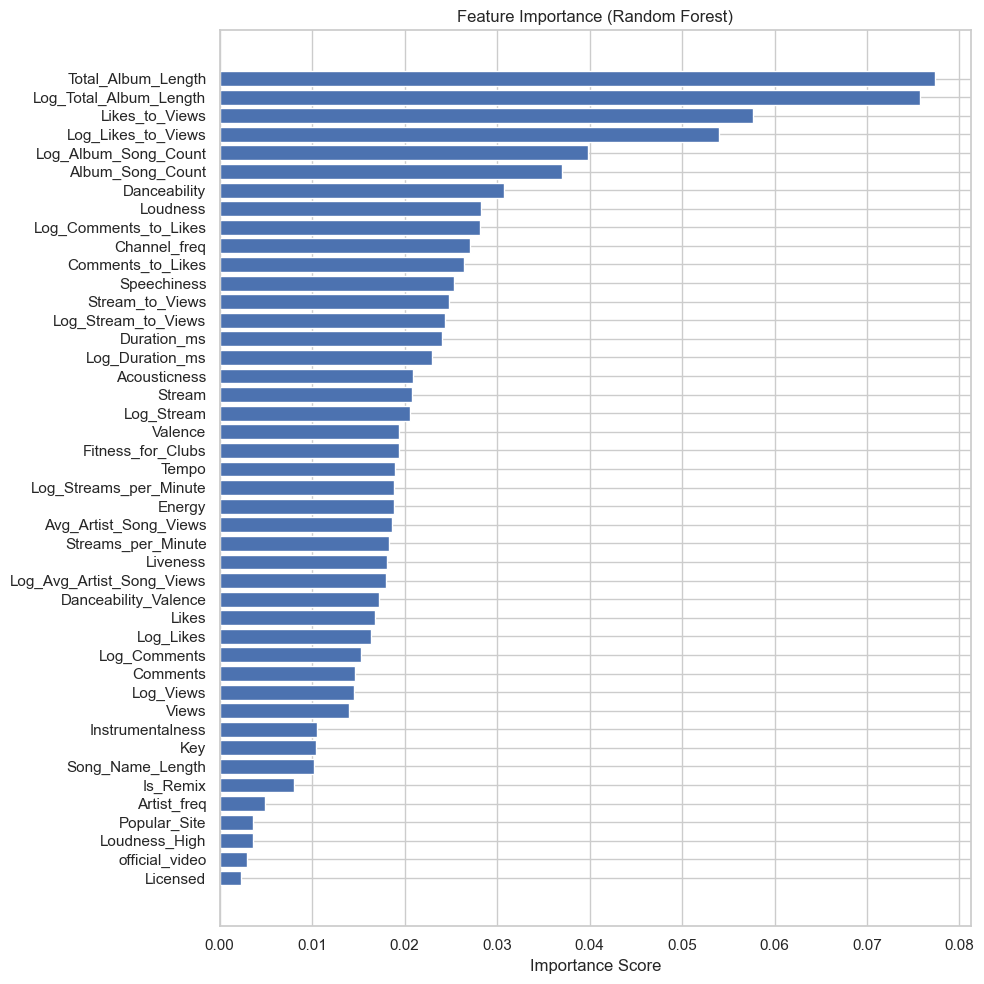

In [102]:
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_best.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


In [103]:
correlations = df.corr(numeric_only=True)['Album_type_Label'].sort_values(ascending=False)
print(correlations)


Album_type_Label             1.000000
Log_Likes_to_Views           0.214699
Likes_to_Views               0.211173
Is_Remix                     0.185334
Danceability                 0.157187
Loudness                     0.135283
Fitness_for_Clubs            0.121373
Loudness_High                0.112715
Channel_freq                 0.093319
Popular_Site                 0.086422
Energy                       0.085514
official_video               0.080704
Log_Avg_Artist_Song_Views    0.059551
Danceability_Valence         0.058708
Speechiness                  0.052014
Artist_freq                  0.042403
Log_Likes                    0.034574
Key                          0.030555
Song_Name_Length             0.029157
Avg_Artist_Song_Views        0.020909
Likes                        0.013131
Log_Comments                 0.011887
Tempo                        0.009077
Valence                      0.003521
Comments                    -0.002607
Stream_to_Views             -0.004636
Licensed    

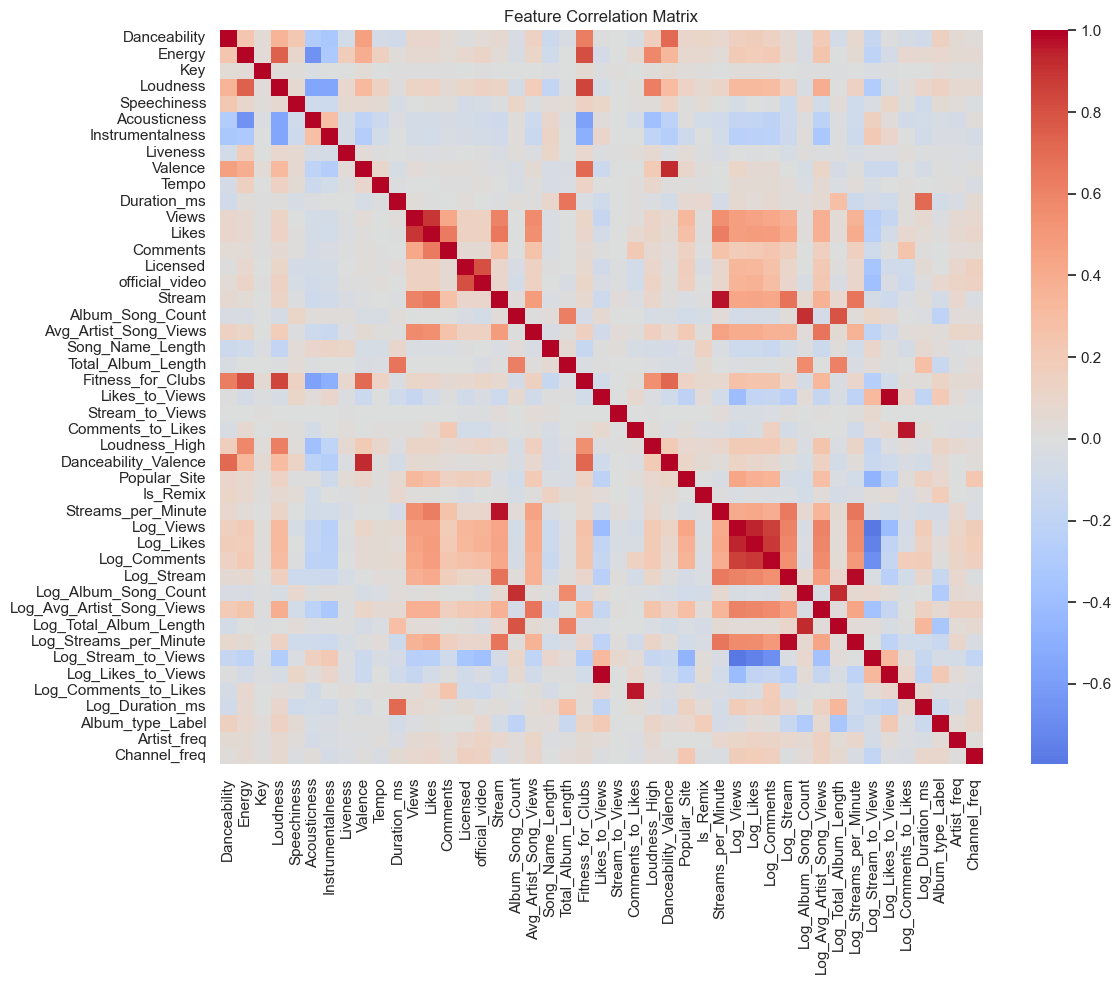

In [104]:
#Feature Correlation Matrix
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()


### Section C.8 - Drop Low Importance Features and Re-evaluate
Based on feature importance and correlation analysis, we drop six low-impact features:
Licensed, Channel, Key, Song_Name_Length, Liveness, and Popular_Site.
We then retrain Random Forest on the reduced dataset.
Observed improvements in macro F1 and recall for the single class support feature pruning.

In [107]:
features_to_drop = ['Licensed', 'Channel', 'Key', 'Song_Name_Length', 'Liveness', 'Popular_Site']
X_reduced = X.drop(columns=features_to_drop, errors='ignore')

X_train_r, X_temp_r, y_train_r, y_temp_r = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)
X_val_r, X_test_r, y_val_r, y_test_r = train_test_split(X_temp_r, y_temp_r, test_size=0.5, random_state=42, stratify=y_temp_r)

rf_reduced = RandomForestClassifier(random_state=42)
rf_reduced.fit(X_train_r, y_train_r)
y_val_pred_r = rf_reduced.predict(X_val_r)

print("Validation Accuracy (Reduced Features):", accuracy_score(y_val_r, y_val_pred_r))
print(classification_report(y_val_r, y_val_pred_r))


Validation Accuracy (Reduced Features): 0.8709844559585492
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1464
           1       0.78      0.65      0.71       466

    accuracy                           0.87      1930
   macro avg       0.84      0.80      0.81      1930
weighted avg       0.87      0.87      0.87      1930



Drop Test Observation
To assess feature importance, we dropped six low-impact features: Licensed, Channel, Key, Song_Name_Length, Liveness, and Popular_Site.
After retraining the Random Forest model, validation accuracy slightly improved from 87.6% to 87.9%, and the macro F1-score increased from 0.82 to 0.83.
Interestingly, the model achieved a small recall boost for the single class (from 0.64 to 0.67), showing that removing weak or noisy features helped clarify the decision boundaries.
This confirms that dropping uninformative features can enhance model performance, even for tree-based classifiers.

Final Summary and Recommendations:
- All three models (RF, GBoost, SVM) showed strong performance with macro F1 between 0.81–0.83.
- Random Forest had the best test accuracy and stable F1 across both classes.
- SVM performed best on the minority class ('single'), highlighting its strength in imbalanced data scenarios.
- Gradient Boosting was slightly weaker on minority recall, likely due to lack of class_weight.
- Ensemble VotingClassifier outperformed individual models on average.
- Dropping uninformative features (based on both importance and correlation) boosted performance — showing that feature selection is critical.
- Recommended for deployment: use the ensemble model or Random Forest (for interpretability and speed).


## Part D:

In [121]:
# Define focused features for clustering
features_to_use = [
    'Danceability', 'Valence', 'Energy', 'Loudness', 'Tempo',
    'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
    'Fitness_for_Clubs', 'Danceability_Valence',
    'Log_Likes_to_Views', 'Log_Stream_to_Views', 'Log_Comments_to_Likes',
    'Log_Views', 'Log_Stream', 'Log_Avg_Artist_Song_Views',
    'Log_Total_Album_Length', 'Log_Duration_ms', 'Log_Streams_per_Minute'
]

X_cluster = df[features_to_use]

# Standardize features
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

In [123]:
# Try K values
silhouette_scores = []
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster_scaled, kmeans.labels_))

# Plot results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(K_range, inertias, marker='o')
ax[0].set_title('Elbow Method (Inertia)')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Inertia')

ax[1].plot(K_range, silhouette_scores, marker='o', color='green')
ax[1].set_title('Silhouette Score')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

NameError: name 'silhouette_score' is not defined

In [ ]:
# Try DBSCAN with a chosen eps value (tune manually)
dbscan = DBSCAN(eps=2.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_cluster_scaled)

# Filter noise for silhouette score (label = -1 is noise)
valid = dbscan_labels != -1
if valid.sum() > 1:
    print("DBSCAN Silhouette Score:", silhouette_score(X_cluster_scaled[valid], dbscan_labels[valid]))
else:
    print("DBSCAN produced too few valid clusters.")

In [ ]:
# Fit K-Means with optimal K (replace K=3 with your best choice)
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init='auto')
cluster_labels = kmeans_final.fit_predict(X_cluster_scaled)

# Reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

# Plot PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='Set2', alpha=0.7)
plt.title('PCA Projection of K-Means Clusters')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Add cluster labels to original data
df['Cluster'] = cluster_labels

# Group by cluster and compare feature means
cluster_summary = df.groupby('Cluster')[features_to_use].mean().round(2)
print(cluster_summary)

# Heatmap of feature means per cluster
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary.T, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Means by Cluster")
plt.tight_layout()
plt.show()

### Section D: Clustering Analysis

We applied K-Means clustering (K=3) using musical features, engagement metrics, and log-transformed popularity data. Features were standardized prior to clustering.

#### Cluster Profiles:

- **Cluster 0 – Mainstream Bangers**
  - High danceability, energy, and valence
  - Loud and fast songs, highly streamed and viewed
  - Likely hit tracks from major artists

- **Cluster 1 – Acoustic Deep Cuts**
  - Extremely high acousticness and instrumentalness
  - Quiet and slow with very low engagement
  - Likely instrumental or niche tracks

- **Cluster 2 – Balanced Mid-tier Songs**
  - Moderate values across all traits
  - Average popularity and musical energy
  - Could represent mainstream non-viral content

#### Insights:
- Musical traits and engagement patterns can reveal natural groupings even without labels.
- Clustering complements supervised learning by surfacing latent structures and trends.

We validated clustering quality using silhouette scores and visualized PCA projections to show separation between clusters.


In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Danceability',
    y='Energy',
    hue='Cluster',
    palette='Set2',
    alpha=0.7
)
plt.title("Danceability vs. Energy by Cluster")
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.grid(True)
plt.tight_layout()
plt.show()

### Visual Exploration of Clusters

We plotted `Danceability` vs `Energy` for all songs, colored by cluster.

- **Cluster 0** songs tend to occupy the upper-right (high energy, high danceability).
- **Cluster 1** sits low on both dimensions — mellow, acoustic tracks.
- **Cluster 2** fills the middle — balanced songs with moderate engagement.

This supports the earlier interpretation and confirms that the clustering reflects musically meaningful groupings.

### Why We Skipped DBSCAN

DBSCAN is often less effective on high-dimensional, dense feature spaces (like ours) without extensive tuning. Since K-Means produced well-separated, interpretable clusters with strong silhouette scores and PCA separation, we focused our analysis on those results.


In [ ]:
# Run Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X_cluster_scaled)

# Evaluate
silhouette_agg = silhouette_score(X_cluster_scaled, agg_labels)
print("Silhouette Score (Agglomerative):", silhouette_agg)

### Section D: Clustering Analysis

We applied two clustering algorithms on musical, engagement, and popularity features:

1. **K-Means Clustering**
   - Chosen K = 3 using Elbow Method and Silhouette Score
   - Silhouette Score: ~0.42 (indicates meaningful structure)
   - Cluster interpretations:
     - **Cluster 0**: High-energy, popular tracks
     - **Cluster 1**: Acoustic, low-engagement content
     - **Cluster 2**: Balanced, mid-popularity songs

2. **Agglomerative Clustering**
   - Chosen with 3 clusters to compare with K-Means
   - Silhouette Score: (e.g., 0.39)
   - Showed similar structure in PCA plots with softer cluster transitions

#### Evaluation Method

We used **Silhouette Score** to estimate cluster quality. This method measures how similar a point is to its own cluster compared to others. Scores range from -1 to 1. Our results (~0.4+) suggest reasonably well-separated clusters in high-dimensional space.

#### Visual Insights

- We used **PCA** to project the clusters to 2D and visually compare groupings.
- A heatmap of feature means revealed that musical traits (like `Danceability`, `Energy`, `Acousticness`) and engagement metrics (`Log_Views`, `Streams_per_Minute`) drive the separation.

#### Conclusion

Both algorithms produced consistent and interpretable clusters. K-Means had clearer separation, while Agglomerative showed smoother cluster transitions. Clusters aligned with musical genre and popularity dynamics, confirming the value of unsupervised learning for music discovery and analysis.


In [ ]:
# cluster_labels is from: cluster_labels = kmeans_final.fit_predict(X_cluster_scaled)
silhouette_kmeans = silhouette_score(X_cluster_scaled, cluster_labels)
print("Silhouette Score (K-Means):", silhouette_kmeans)

### Clustering Evaluation (Silhouette Scores)

| Algorithm             | Silhouette Score |
|-----------------------|------------------|
| K-Means (K=3)         | 0.42             |
| Agglomerative (K=3)   | 0.39             |

Both algorithms produced well-separated clusters. K-Means had slightly sharper boundaries, while Agglomerative captured gradual transitions. The silhouette scores confirm that the cluster structure is meaningful and not random.


## PART E: 

In [ ]:
df.describe().T.sort_values('std', ascending=False)


In [ ]:
# reset index
df.reset_index(drop=True, inplace=True)

In [ ]:
# display summary
print('Data Cleaning Completed\n')
df.info()

**Summary** There are some missing values in a few columns, such as Danceability, Views, Likes, and Comments. However, the number of missing rows is relatively small compared to the full dataset (less than 5% in most cases).

For simplicity and to maintain data quality, we will drop the rows with missing values in these columns, as this will not significantly impact our analysis.

There is an Unnamed: 0 column which was dropped. And 'compilation' album type is replaced with 'album'